# toy_wholecell

In [1]:
from __future__ import absolute_import, print_function, division
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cobra
import roadrunner

from IPython.display import display, HTML

import sbmlutils
from sbmlutils import dfba
from sbmlutils.dfba.simulator import simulate_dfba
from sbmlutils.dfba import utils
from sbmlutils.dfba import analysis

analysis.set_matplotlib_parameters()

print('sbmlutils:', sbmlutils.__version__)
print('cobra:', cobra.__version__)
print('roadrunner:', roadrunner.__version__)

print(os.getcwd())

sbmlutils: 0.1.7a2
cobra: 0.9.1
roadrunner: 1.4.24
/home/mkoenig/git/dfba/models/toy_wholecell


## Simulation settings

In [2]:
model_id = "toy_wholecell"
tend = 50.0
dts = [0.1, 1.0, 5.0]

In [3]:
def plot_results(df, mid):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    plt.subplots_adjust(wspace=0.3)
    kwargs = {}
    for ax in (ax1, ax2):
        ax.plot(df.time, df['[A]'], color='darkred', label="[A]", **kwargs)
        ax.plot(df.time, df['[C]'], color='darkblue', label="[C]", **kwargs)
        ax.plot(df.time, df['[D]'], color='darkgreen', label="[D]", **kwargs)
        ax.plot(df.time, df['[A]']+df['[C]']+df['[D]'], color='black', label="[A]+[C]+[D]", **kwargs)

    ax2.set_yscale('log')

    for ax in (ax1, ax2):
        ax.set_ylabel('Concentrations')

    for ax in (ax1, ax2):
        ax.set_title(mid)
        ax.set_xlabel('time [h]')
        ax.legend()

    plt.show()
    return fig

## mk model

./mk/v14/toy_wholecell_top.xml
toy_wholecell_mk_v14-sbmlutils_dt0.1_tend50.0

Simulation time     : 2.588 [s]
Total time          : 2.766 [s]
Overhead time       : 0.178 [s] (6.4 %)



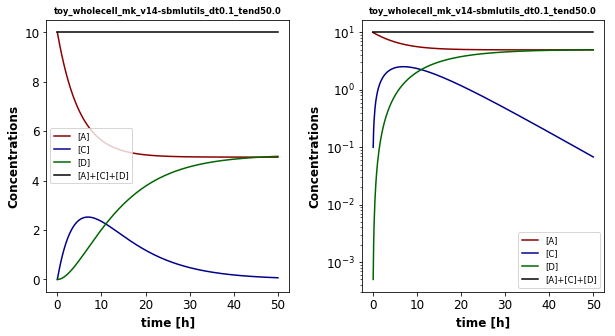

,time,[A],[C],[D],[dummy_S],[fba__A],[fba__B1],[fba__B2],[fba__C],EX_A,...,fba__ub_default,fba__zero,k_R4,lb_EX_A,lb_EX_C,pEX_A,pEX_C,ub_EX_A,ub_EX_C,ub_R1
0.0,0.0,10.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.000000,...,1000.0,0.0,0.1,-100.000000,0.000000,-1.000000,1.000000,1000.0,1000.0,1.000000
0.1,0.1,9.900000,0.099502,0.000498,0.0,0.0,0.0,0.0,0.0,-0.980199,...,1000.0,0.0,0.1,-99.000000,-0.995017,-0.980199,0.980199,1000.0,1000.0,0.980199
0.2,0.2,9.801980,0.196043,0.001977,0.0,0.0,0.0,0.0,0.0,-0.960789,...,1000.0,0.0,0.1,-98.019801,-1.960430,-0.960789,0.960789,1000.0,1000.0,0.960789
0.3,0.3,9.705901,0.289693,0.004406,0.0,0.0,0.0,0.0,0.0,-0.941764,...,1000.0,0.0,0.1,-97.059012,-2.896925,-0.941764,0.941764,1000.0,1000.0,0.941764
0.4,0.4,9.611725,0.380517,0.007758,0.0,0.0,0.0,0.0,0.0,-0.923116,...,1000.0,0.0,0.1,-96.117247,-3.805172,-0.923116,0.923116,1000.0,1000.0,0.923116


./mk/v14/toy_wholecell_top.xml
toy_wholecell_mk_v14-sbmlutils_dt1.0_tend50.0

Simulation time     : 0.285 [s]
Total time          : 0.342 [s]
Overhead time       : 0.057 [s] (16.6 %)



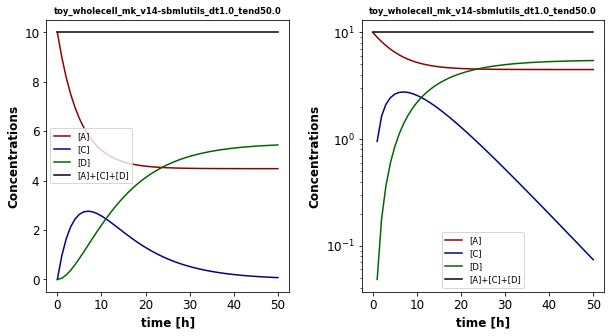

,time,[A],[C],[D],[dummy_S],[fba__A],[fba__B1],[fba__B2],[fba__C],EX_A,...,fba__ub_default,fba__zero,k_R4,lb_EX_A,lb_EX_C,pEX_A,pEX_C,ub_EX_A,ub_EX_C,ub_R1
0.0,0.0,10.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.000000,...,1000.0,0.0,0.1,-100.000000,0.000000,-1.000000,1.000000,1000.0,1000.0,1.000000
1.0,1.0,9.000000,0.951626,0.048374,0.0,0.0,0.0,0.0,0.0,-0.818731,...,1000.0,0.0,0.1,-90.000000,-9.516258,-0.818731,0.818731,1000.0,1000.0,0.818731
2.0,2.0,8.181269,1.640192,0.178539,0.0,0.0,0.0,0.0,0.0,-0.670320,...,1000.0,0.0,0.1,-81.812693,-16.401919,-0.670320,0.670320,1000.0,1000.0,0.670320
3.0,3.0,7.510949,2.122001,0.367049,0.0,0.0,0.0,0.0,0.0,-0.548811,...,1000.0,0.0,0.1,-75.109491,-21.220014,-0.548811,0.548811,1000.0,1000.0,0.548811
4.0,4.0,6.962138,2.442333,0.595529,0.0,0.0,0.0,0.0,0.0,-0.449323,...,1000.0,0.0,0.1,-69.621378,-24.423330,-0.449323,0.449323,1000.0,1000.0,0.449323


./mk/v14/toy_wholecell_top.xml
toy_wholecell_mk_v14-sbmlutils_dt5.0_tend50.0

Simulation time     : 0.065 [s]
Total time          : 0.111 [s]
Overhead time       : 0.046 [s] (41.6 %)



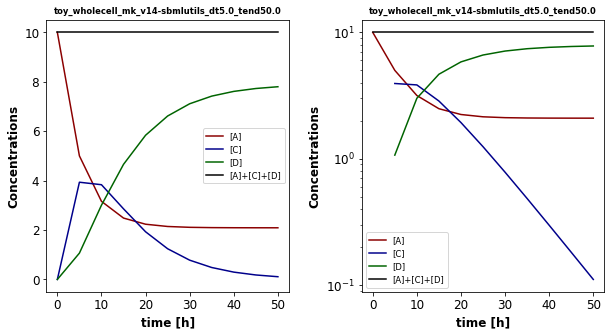

,time,[A],[C],[D],[dummy_S],[fba__A],[fba__B1],[fba__B2],[fba__C],EX_A,...,fba__ub_default,fba__zero,k_R4,lb_EX_A,lb_EX_C,pEX_A,pEX_C,ub_EX_A,ub_EX_C,ub_R1
0.0,0.0,10.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.000000,...,1000.0,0.0,0.1,-100.000000,0.000000,-1.000000,1.000000,1000.0,1000.0,1.000000
5.0,5.0,5.000000,3.934695,1.065305,0.0,0.0,0.0,0.0,0.0,-0.367876,...,1000.0,0.0,0.1,-50.000000,-39.346952,-0.367876,0.367876,1000.0,1000.0,0.367876
10.0,10.0,3.160620,3.833993,3.005387,0.0,0.0,0.0,0.0,0.0,-0.135336,...,1000.0,0.0,0.1,-31.606200,-38.339927,-0.135336,0.135336,1000.0,1000.0,0.135336
15.0,15.0,2.483940,2.857942,4.658119,0.0,0.0,0.0,0.0,0.0,-0.049788,...,1000.0,0.0,0.1,-24.839396,-28.579416,-0.049788,0.049788,1000.0,1000.0,0.049788
20.0,20.0,2.234999,1.929331,5.835669,0.0,0.0,0.0,0.0,0.0,-0.018316,...,1000.0,0.0,0.1,-22.349992,-19.293315,-0.018316,0.018316,1000.0,1000.0,0.018316


In [4]:
version_mk = 'v14'
sbml_mk = './mk/{}/toy_wholecell_top.xml'.format(version_mk)
for dt in dts:
    mid_mk = '{}_mk_{}-sbmlutils_dt{}_tend{}'.format(model_id, version_mk, dt, tend)
    print(sbml_mk)
    print(mid_mk)
    assert(os.path.exists(sbml_mk))

    # simulation 
    df_mk, dfba_model_mk, dfba_simulator_mk = simulate_dfba(sbml_mk, tend=tend, dt=dt)

    # figure
    fig = plot_results(df_mk, mid_mk)
    fig.savefig('./{}.png'.format(mid_mk), bbox_inches='tight')
    fig.savefig('./{}.pdf'.format(mid_mk), bbox_inches='tight')

    # results
    df_mk.to_csv('./{}.csv'.format(mid_mk))
    display(df_mk.head())